<a href="https://colab.research.google.com/github/Thasni-pu/projects/blob/main/fraud_credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,f1_score,classification_report,accuracy_score

df1=pd.read_csv('/content/fraudTest.csv')
df2=pd.read_csv('/content/fraudTrain.csv')



In [ ]:
full=pd.concat([df1,df2])

In [ ]:
full.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
full.isna().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [ ]:
full.dtypes

,0
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


In [ ]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               

In [ ]:
fraud=full[full["is_fraud"]==1]
non_fraud=full[full["is_fraud"]==0]
print(fraud.shape[0])
print(non_fraud.shape[0])



9651
1842743


In [ ]:
non_fraud=non_fraud.sample(fraud.shape[0])
data=pd.concat([fraud,non_fraud])
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1685,1685,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1
1767,1767,2020-06-21 22:32:22,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1
1781,1781,2020-06-21 22:37:27,6564459919350820,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1
1784,1784,2020-06-21 22:38:55,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1
1857,1857,2020-06-21 23:02:16,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115373,115373,2020-07-31 19:20:59,4859525594182537,"fraud_Effertz, Welch and Schowalter",entertainment,14.60,Rebecca,Farley,F,383 Long Islands,...,42.0716,-75.0152,1228,"Psychotherapist, child",1990-02-25,23b1148ad1413cd7396c6a6d111e368a,1375298459,42.001638,-74.748392,0
382597,382597,2019-06-24 15:15:52,4600155880464,fraud_Kutch-Ferry,home,59.39,Charles,Copeland,M,92213 Lee Well,...,26.7832,-80.0638,459921,"Administrator, arts",1969-09-08,edc153262dc1f416e88a321f6283e9bf,1340550952,25.842692,-80.452009,0
858303,858303,2019-12-16 20:20:50,2274911989136158,fraud_Zulauf LLC,personal_care,6.18,Robert,Velazquez,M,3136 Silva Stream,...,39.5102,-104.7216,84861,Materials engineer,1932-03-10,8f655e95a5ff59003fe1f3c71bc10e80,1355689250,40.487134,-104.849404,0
210130,210130,2019-04-17 10:25:41,30248898834493,fraud_Emard Inc,gas_transport,76.36,Michael,Rodriguez,M,172 Paula Inlet Apt. 650,...,32.1482,-99.1872,1897,Chief Operating Officer,1953-04-19,232a708dfd5e4a65f906395e88cf4a2c,1334658341,32.655124,-98.417017,0


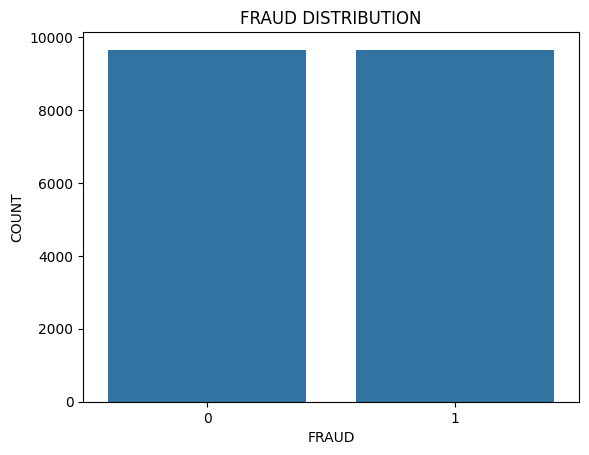

In [ ]:
fraud_counts=data["is_fraud"].value_counts()
sns.barplot(x=fraud_counts.index,y=fraud_counts.values)
plt.title('FRAUD DISTRIBUTION')
plt.xlabel("FRAUD")
plt.ylabel("COUNT")
plt.show()

In [ ]:
data.drop(columns=['Unnamed: 0','first','last','unix_time','street','gender','job','dob','city','state','trans_num','merchant'],inplace=True)
data

,trans_date_trans_time,cc_num,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
1685,2020-06-21 22:06:39,3560725013359375,health_fitness,24.84,79759,31.8599,-102.7413,23,32.575873,-102.604290,1
1767,2020-06-21 22:32:22,6564459919350820,misc_net,780.52,53803,42.5545,-90.3508,1306,42.461127,-91.147148,1
1781,2020-06-21 22:37:27,6564459919350820,entertainment,620.33,53803,42.5545,-90.3508,1306,42.771834,-90.158365,1
1784,2020-06-21 22:38:55,4005676619255478,shopping_net,1077.69,70726,30.4590,-90.9027,71335,31.204974,-90.261595,1
1857,2020-06-21 23:02:16,3560725013359375,shopping_pos,842.65,79759,31.8599,-102.7413,23,31.315782,-102.736390,1
...,...,...,...,...,...,...,...,...,...,...,...
115373,2020-07-31 19:20:59,4859525594182537,entertainment,14.60,13755,42.0716,-75.0152,1228,42.001638,-74.748392,0
382597,2019-06-24 15:15:52,4600155880464,home,59.39,33404,26.7832,-80.0638,459921,25.842692,-80.452009,0
858303,2019-12-16 20:20:50,2274911989136158,personal_care,6.18,80138,39.5102,-104.7216,84861,40.487134,-104.849404,0
210130,2019-04-17 10:25:41,30248898834493,gas_transport,76.36,76443,32.1482,-99.1872,1897,32.655124,-98.417017,0


In [ ]:
data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])
data['trans_day']=data['trans_date_trans_time'].dt.day
data['trans_month']=data['trans_date_trans_time'].dt.month
data['trans_year']=data['trans_date_trans_time'].dt.year
data['trans_hour']=data['trans_date_trans_time'].dt.hour
data['trans_minute']=data['trans_date_trans_time'].dt.minute
data.drop(columns=['trans_date_trans_time'],inplace=True)

In [ ]:
data.dtypes


,0
cc_num,int64
category,object
amt,float64
zip,int64
lat,float64
long,float64
city_pop,int64
merch_lat,float64
merch_long,float64
is_fraud,int64


In [ ]:
data['category'].unique()


array(['health_fitness', 'misc_net', 'entertainment', 'shopping_net',
       'shopping_pos', 'misc_pos', 'grocery_pos', 'grocery_net',
       'personal_care', 'home', 'gas_transport', 'travel', 'food_dining',
       'kids_pets'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'personal_care'),
  Text(1, 0, 'health_fitness'),
  Text(2, 0, 'misc_pos'),
  Text(3, 0, 'travel'),
  Text(4, 0, 'kids_pets'),
  Text(5, 0, 'shopping_pos'),
  Text(6, 0, 'food_dining'),
  Text(7, 0, 'home'),
  Text(8, 0, 'entertainment'),
  Text(9, 0, 'shopping_net'),
  Text(10, 0, 'misc_net'),
  Text(11, 0, 'grocery_pos'),
  Text(12, 0, 'gas_transport'),
  Text(13, 0, 'grocery_net')])

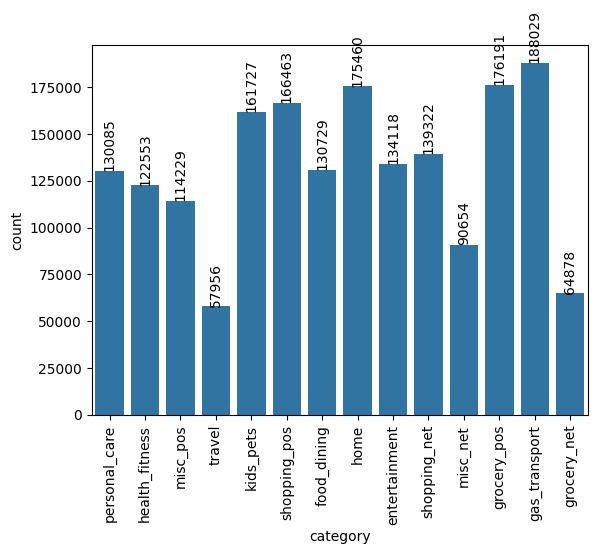

In [ ]:
a=sns.countplot(x='category',data=full)
a.bar_label(a.containers[0], label_type='edge', rotation=90)
plt.xticks(rotation=90)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['category']=le.fit_transform(data['category'])

In [ ]:
data.dtypes

,0
cc_num,int64
category,int64
amt,float64
zip,int64
lat,float64
long,float64
city_pop,int64
merch_lat,float64
merch_long,float64
is_fraud,int64


In [ ]:
data.tail()

,cc_num,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_day,trans_month,trans_year,trans_hour,trans_minute
115373,4859525594182537,0,14.60,13755,42.0716,-75.0152,1228,42.001638,-74.748392,0,31,7,2020,19,20
382597,4600155880464,6,59.39,33404,26.7832,-80.0638,459921,25.842692,-80.452009,0,24,6,2019,15,15
858303,2274911989136158,10,6.18,80138,39.5102,-104.7216,84861,40.487134,-104.849404,0,16,12,2019,20,20
210130,30248898834493,2,76.36,76443,32.1482,-99.1872,1897,32.655124,-98.417017,0,17,4,2019,10,25
1024940,3506592072985012,2,47.02,63021,38.5770,-90.5255,92608,38.968826,-90.758267,0,1,3,2020,1,15


In [ ]:
from sklearn.preprocessing import StandardScaler
num_columns=['amt','zip','city_pop','cc_num']
scaler=StandardScaler()
data[num_columns]=scaler.fit_transform(data[num_columns])

In [ ]:
x=data.drop('is_fraud',axis=1)
x

,cc_num,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,trans_day,trans_month,trans_year,trans_hour,trans_minute
1685,-0.313036,5,-0.739465,1.161546,31.8599,-102.7413,-0.295754,32.575873,-102.604290,21,6,2020,22,6
1767,-0.310718,8,1.305384,0.200095,42.5545,-90.3508,-0.291532,42.461127,-91.147148,21,6,2020,22,32
1781,-0.310718,0,0.871914,0.200095,42.5545,-90.3508,-0.291532,42.771834,-90.158365,21,6,2020,22,37
1784,-0.312693,11,2.109518,0.826950,30.4590,-90.9027,-0.061059,31.204974,-90.261595,21,6,2020,22,38
1857,-0.313036,12,1.473506,1.161546,31.8599,-102.7413,-0.295754,31.315782,-102.736390,21,6,2020,23,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115373,-0.312034,0,-0.767174,-1.283345,42.0716,-75.0152,-0.291788,42.001638,-74.748392,31,7,2020,19,20
382597,-0.315780,6,-0.645974,-0.555515,26.7832,-80.0638,1.217818,25.842692,-80.452009,24,6,2019,15,15
858303,-0.314028,10,-0.789959,1.175585,39.5102,-104.7216,-0.016544,40.487134,-104.849404,16,12,2019,20,20
210130,-0.315760,2,-0.600053,1.038717,32.1482,-99.1872,-0.289587,32.655124,-98.417017,17,4,2019,10,25


In [ ]:
y=data['is_fraud']
y

,is_fraud
1685,1
1767,1
1781,1
1784,1
1857,1
...,...
115373,0
382597,0
858303,0
210130,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Classification report:',classification_report(y_test,y_pred))
print('F1 score:',f1_score(y_test,y_pred))
print('Confusion matrix:',confusion_matrix(y_test,y_pred))

Accuracy: 0.9640821965118287
Classification report:               precision    recall  f1-score   support

           0       0.96      0.97      0.96      2855
           1       0.97      0.96      0.96      2936

    accuracy                           0.96      5791
   macro avg       0.96      0.96      0.96      5791
weighted avg       0.96      0.96      0.96      5791

F1 score: 0.9644565960355435
Confusion matrix: [[2761   94]
 [ 114 2822]]


In [ ]:
lr_model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Classification report:',classification_report(y_test,y_pred))
print('F1 score:',f1_score(y_test,y_pred))
print('Confusion matrix:',confusion_matrix(y_test,y_pred))

Accuracy: 0.9644275600069073
Classification report:               precision    recall  f1-score   support

           0       0.96      0.97      0.96      2855
           1       0.97      0.96      0.96      2936

    accuracy                           0.96      5791
   macro avg       0.96      0.96      0.96      5791
weighted avg       0.96      0.96      0.96      5791

F1 score: 0.9647742818057455
Confusion matrix: [[2764   91]
 [ 115 2821]]


Text(0.5, 1.0, 'Confusion Matrix')

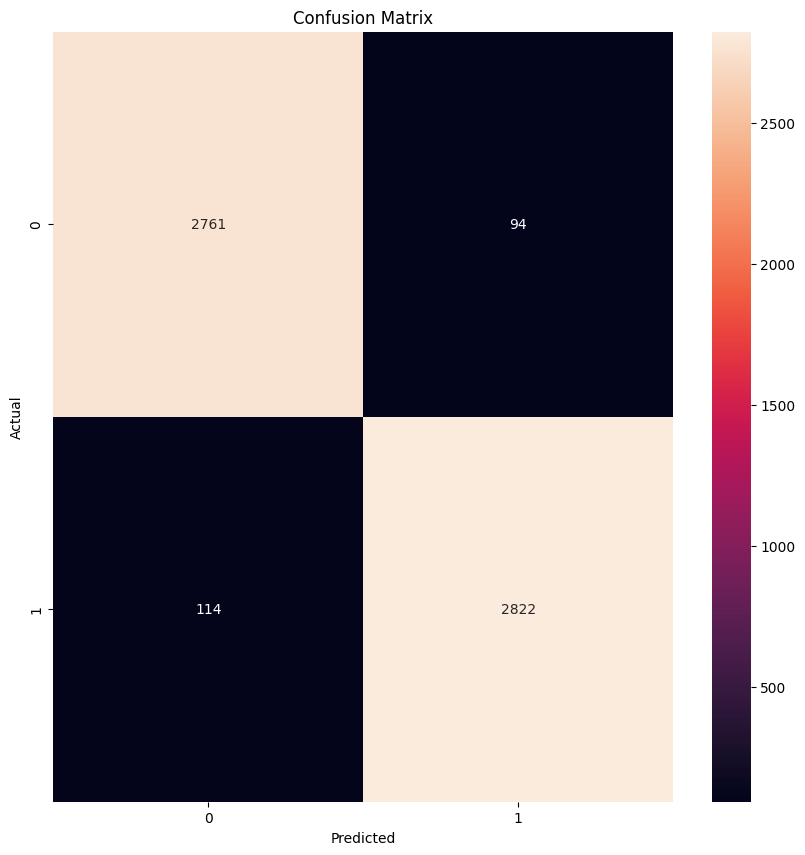

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title( 'Confusion Matrix')